# InstaCart Final Report

## This notebook contains the following topics:

### 01. Import Libraries and Files
### 02. Personally identifiable information (PII)
### 03. Merging Dataframes
### 04. Regional Sementation of Data
### 05. Spending and loyalty habits of customers
### 06. Exclusion flag for low-activity customers
### 07. Profiling Customer
### 08. Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
### 09. Comparing profiles with regions
### 10. Exporting dataframes as pickle files

# 01. Import Libraries and Files

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path
path = r'C:\Users\olufunsoo\Documents\Data Analysis\DD-MM-2020-Instacart-Basket-Analysis--Report-'

### Import files

In [3]:
# Import file 'customer_prepared.csv' as df_customers
df_customer = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'customer_prepared.csv'), index_col = False)

In [4]:
# Check output 
df_customer.head()

,Unnamed: 0,user_id,First Name,Surname,Gender,STATE,Age,date_joined,number_of_dependants,family_status,income
0,0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [7]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Unnamed: 0            206209 non-null  int64 
 1   user_id               206209 non-null  int64 
 2   First Name            194950 non-null  object
 3   Surname               206209 non-null  object
 4   Gender                206209 non-null  object
 5   STATE                 206209 non-null  object
 6   Age                   206209 non-null  int64 
 7   date_joined           206209 non-null  object
 8   number_of_dependants  206209 non-null  int64 
 9   family_status         206209 non-null  object
 10  income                206209 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 17.3+ MB


In [4]:
# Import file 'ords_prods_merged_4_9.pkl' as df_op
df_op = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merged_4_9.pkl'))

In [6]:
# Check output
df_op.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_prior_order,order_frequency_flag
0,2539329,1,1,2,8,NaN,196,Soda,7,9.0,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,Least busy 2,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,Least busy 2,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,Least busy 1,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,Least busy 1,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


In [8]:
df_op.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   user_id                 object 
 2   order_number            int8   
 3   order_day_of_week       int8   
 4   order_hour_of_day       int8   
 5   days_since_prior_order  float16
 6   product_id              int32  
 7   product_name            object 
 8   department_id           int64  
 9   prices                  float64
 10  busiest_days            object 
 11  busiest_period_of_day   object 
 12  max_order               int8   
 13  loyalty_flag            object 
 14  mean_prices             float64
 15  spending_flag           object 
 16  median_prior_order      float16
 17  order_frequency_flag    object 
dtypes: float16(2), float64(2), int32(2), int64(1), int8(4), object(7)
memory usage: 2.9+ GB


In [9]:
# Changing datatype of 'user_id' in df_customer to str
df_customer['user_id'] = df_customer['user_id'].astype('str')

In [10]:
# Checking output
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Unnamed: 0            206209 non-null  int64 
 1   user_id               206209 non-null  object
 2   First Name            194950 non-null  object
 3   Surname               206209 non-null  object
 4   Gender                206209 non-null  object
 5   STATE                 206209 non-null  object
 6   Age                   206209 non-null  int64 
 7   date_joined           206209 non-null  object
 8   number_of_dependants  206209 non-null  int64 
 9   family_status         206209 non-null  object
 10  income                206209 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 17.3+ MB


In [41]:
# Importing file 'departments_wrangled.csv' as df_dep
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [42]:
# Checking output
df_dep.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [43]:
df_dep.rename(columns = {'Unnamed: 0': 'department_id'}, inplace = True)

In [44]:
# Checking output
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [7]:
# Import 'customer_orders_products_dept.pkl' as df_copd
df_copd = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_orders_products_dept.pkl'))

# 02. Personally Identifiable Information (PII)

In [13]:
# Dropping PII columns ('First_Name' and 'Surname') and unnecessary column ('Unnamed: 0') in df_customer
df_customer = df_customer.drop(columns = ['Unnamed: 0', 'First Name', 'Surname'])

In [14]:
# Checking output
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   user_id               206209 non-null  object
 1   Gender                206209 non-null  object
 2   STATE                 206209 non-null  object
 3   Age                   206209 non-null  int64 
 4   date_joined           206209 non-null  object
 5   number_of_dependants  206209 non-null  int64 
 6   family_status         206209 non-null  object
 7   income                206209 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 12.6+ MB


# 03. Merging dataframes

In [15]:
# Merge df_customer and df_op on 'user_id' to become df_cop
df_cop = df_customer.merge(df_op, on = 'user_id', indicator = True)

In [16]:
# Checking output
df_cop.head()

,user_id,Gender,STATE,Age,date_joined,number_of_dependants,family_status,income,order_id,order_number,...,prices,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_prior_order,order_frequency_flag,_merge
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,9.0,Busiest day 2,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,9.0,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,9.0,Busiest day 2,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,12.6,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,12.6,Least busy 2,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


In [17]:
df_cop.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined',
       'number_of_dependants', 'family_status', 'income', 'order_id',
       'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'product_name', 'department_id',
       'prices', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_prices', 'spending_flag', 'median_prior_order',
       'order_frequency_flag', '_merge'],
      dtype='object')

In [46]:
# Merging df_cop with df_dep
df_copd =df_cop.merge(df_dep, on = 'department_id')

In [47]:
# Checking output
df_copd.head()

,user_id,Gender,STATE,Age,date_joined,number_of_dependants,family_status,income,order_id,order_number,...,max_order,loyalty_flag,mean_prices,spending_flag,median_prior_order,order_frequency_flag,_merge,Region,customer_profile_1,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,Married middle-aged parent,beverages
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,Married middle-aged parent,beverages
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,Married middle-aged parent,beverages
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,896617,5,...,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,both,West,Single young adult,beverages
4,65803,Male,Idaho,35,1/1/2017,2,married,99568,3233494,6,...,9,New customer,8.375962,Low spender,7.0,Frequent customer,both,West,Married young parent,beverages


In [48]:
df_copd.shape

(24414877, 29)

# 04. Regional Sementation of Data

## Deriving new column 'Region' from 'STATE'

In [18]:
# Creating new column 'Region' from column 'State' by defining function
def state_label(row):
    if row['STATE'] in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        return 'Northeast'
    elif (row['STATE'] in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']):
        return 'Midwest'
    elif(row['STATE'] in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']):
        return 'South'
    elif (row ['STATE'] in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California','Hawaii']):
        return 'West'
    else: return 'Region not specified'

In [19]:
# Applying function on df_cop
df_cop['Region'] = df_cop.apply(state_label, axis = 1)

In [20]:
# Checking frequency of new column
df_cop['Region'].value_counts()

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

# 05. Spending and loyalty habits of customers

In [100]:
# Crosstabing the new variable 'Region' with the column 'spending flag' to see whether there is a difference
regional_spending_habit = pd.crosstab(df_cop['Region'], df_cop['spending_flag'], dropna = False)

In [101]:
regional_spending_habit

spending_flag,Higher spender,Low spender
Region,,
Midwest,119208,5592548
Northeast,82617,4232654
South,159228,7969858
West,121686,6137078


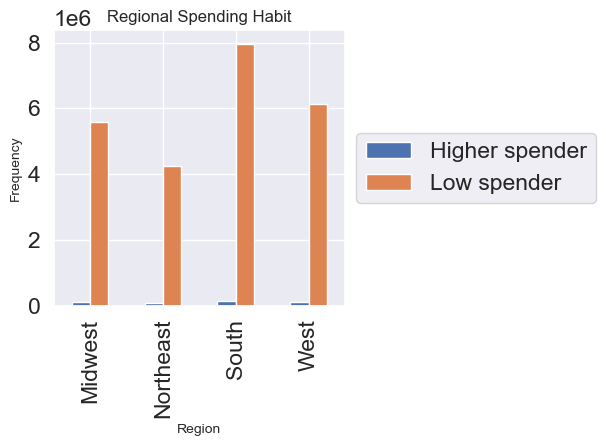

In [102]:
# Create visualization for 'regional_spending_habit'
regional_spending_bar_chart = regional_spending_habit.plot.bar()
plt.xlabel("Region", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Regional Spending Habit", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

In [103]:
# Normalizing 'regional_spending_habit'
regional_spending_habit_n = pd.crosstab(df_cop['Region'], df_cop['spending_flag'], dropna = False, normalize = 'columns')

In [104]:
# Checking output
regional_spending_habit_n

spending_flag,Higher spender,Low spender
Region,,
Midwest,0.246941,0.233684
Northeast,0.171142,0.176861
South,0.329843,0.333019
West,0.252074,0.256437


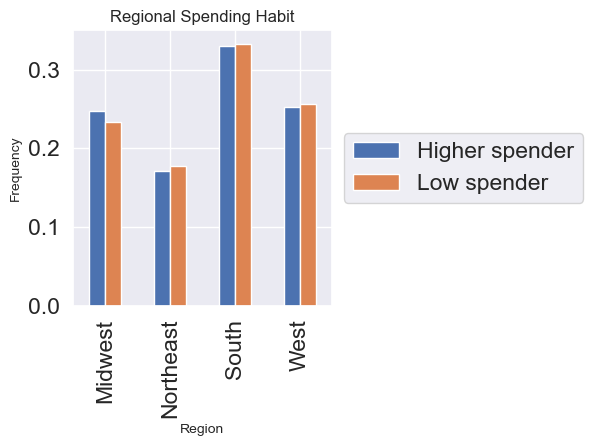

In [105]:
# Create visualization for 'regional_spending_habit_n'
regional_spending_bar_n_chart = regional_spending_habit_n.plot.bar()
plt.xlabel("Region", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Regional Spending Habit", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

### The table and chart above show that there is a difference in the spending habits across the different regions in the USA, with the highest numbers of spenders, both high and low, found in the South.

### Accessing customers' Loyalty Status

In [249]:
# Crosstabing the variable 'loyalty_flag' with variable 'customer_profile_1'
loyal_spending_family = pd.crosstab(df_copd['loyalty_flag'], df_copd['customer_profile_1'], dropna = False, normalize = 'columns')

In [250]:
loyal_spending_family

customer_profile_1,Married elderly parent,Married middle-aged parent,Married young parent,Single elderly adult,Single middle-aged adult,Single young adult,Single young dependent
loyalty_flag,,,,,,,
Loyal customer,0.391810,0.390662,0.388620,0.392495,0.403923,0.386650,0.390608
New customer,0.088082,0.087334,0.084788,0.085165,0.085124,0.089451,0.083403
Regular customer,0.520108,0.522004,0.526592,0.522340,0.510953,0.523899,0.525989


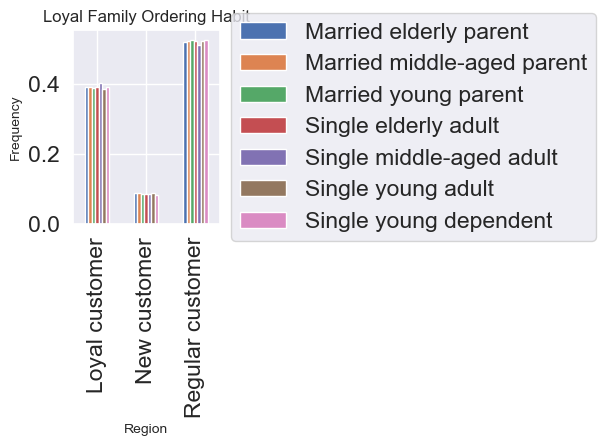

In [253]:
loyal_spending_family_bar = loyal_spending_family.plot.bar()
plt.xlabel("Region", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Loyal Family Ordering Habit", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()  

In [12]:
# Crosstabing the variable 'loyalty_flag' with variable 'spending flag'
loyal_spending = pd.crosstab(df_copd['loyalty_flag'], df_copd['spending_flag'], dropna = False, normalize = 'columns')

In [13]:
loyal_spending

spending_flag,Higher spender,Low spender
loyalty_flag,,
Loyal customer,0.417762,0.390848
New customer,0.075136,0.086852
Regular customer,0.507102,0.522300


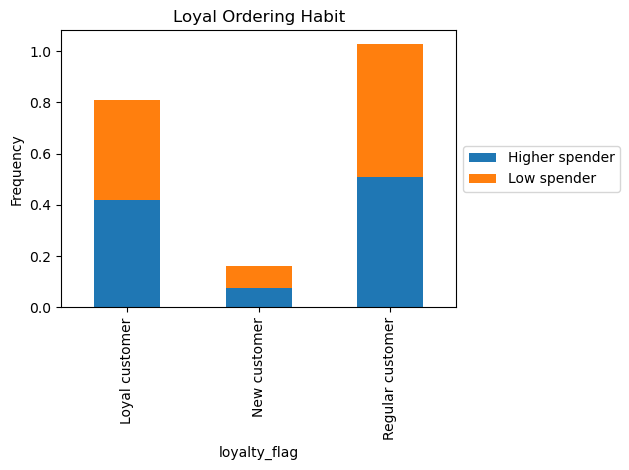

In [14]:
loyal_spending_bar = loyal_spending.plot.bar(stacked = True)
plt.ylabel("Frequency",fontsize=10)
plt.title("Loyal Ordering Habit", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()  

In [256]:
# Crosstabing the variable 'loyalty_flag' with variable 'department'
loyal_spending_dept = pd.crosstab(df_copd['loyalty_flag'], df_copd['department'], dropna = False, normalize = 'columns')

In [257]:
loyal_spending_dept

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
loyalty_flag,,,,,,,,,,,,,,,,,,,,,
Loyal customer,0.334994,0.462022,0.399684,0.39165,0.390990,0.468829,0.348052,0.413146,0.383089,0.354297,...,0.339739,0.365154,0.358209,0.317647,0.369469,0.375711,0.350895,0.328341,0.404843,0.400028
New customer,0.104666,0.062510,0.085040,0.08635,0.088293,0.069454,0.100567,0.080031,0.087775,0.099109,...,0.104348,0.096731,0.093359,0.131482,0.096076,0.093320,0.100651,0.096213,0.082385,0.083135
Regular customer,0.560340,0.475468,0.515276,0.52200,0.520717,0.461717,0.551380,0.506823,0.529136,0.546594,...,0.555913,0.538115,0.548432,0.550871,0.534455,0.530969,0.548453,0.575446,0.512772,0.516837


In [258]:
# Crosstabing the variable 'loyalty_flag' with variable 'order_day_of_week'
loyal_spending_day = pd.crosstab(df_copd['loyalty_flag'], df_copd['order_day_of_week'], dropna = False, normalize = 'columns')

In [259]:
loyal_spending_day

order_day_of_week,0,1,2,3,4,5,6
loyalty_flag,,,,,,,
Loyal customer,0.353154,0.400206,0.397594,0.406474,0.417239,0.420575,0.363307
New customer,0.094112,0.084237,0.086322,0.084637,0.082155,0.081131,0.090496
Regular customer,0.552734,0.515557,0.516085,0.508889,0.500606,0.498293,0.546197


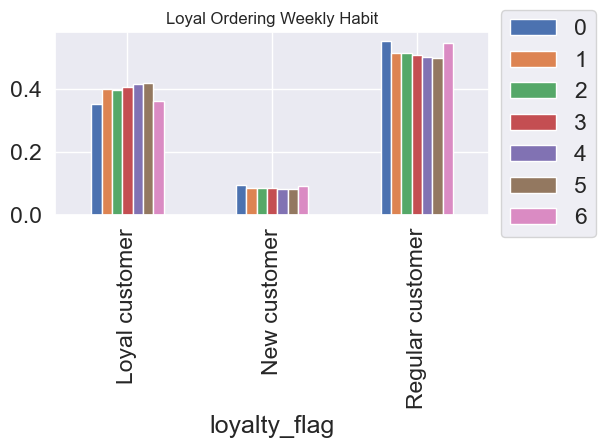

In [262]:
loyal_spending_day_bar = loyal_spending_day.plot.bar()
plt.title("Loyal Ordering Weekly Habit", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

In [8]:
# Crosstabing the variable 'customer_profile_1' with variable 'order_day_of_week'
family_spending_day = pd.crosstab(df_copd['customer_profile_1'], df_copd['order_day_of_week'], dropna = False, normalize = 'columns')

In [9]:
family_spending_day

order_day_of_week,0,1,2,3,4,5,6
customer_profile_1,,,,,,,
Married elderly parent,0.255848,0.252893,0.255168,0.257647,0.256780,0.255827,0.256393
Married middle-aged parent,0.233127,0.235411,0.237696,0.234297,0.234439,0.232323,0.239338
Married young parent,0.213391,0.211147,0.210271,0.210083,0.211963,0.211857,0.208586
Single elderly adult,0.084979,0.085083,0.085330,0.086461,0.084504,0.086424,0.086566
Single middle-aged adult,0.080096,0.078471,0.078704,0.078100,0.077771,0.080170,0.077699
Single young adult,0.085069,0.088951,0.084947,0.085559,0.086546,0.084629,0.083429
Single young dependent,0.047491,0.048046,0.047883,0.047852,0.047997,0.048770,0.047989


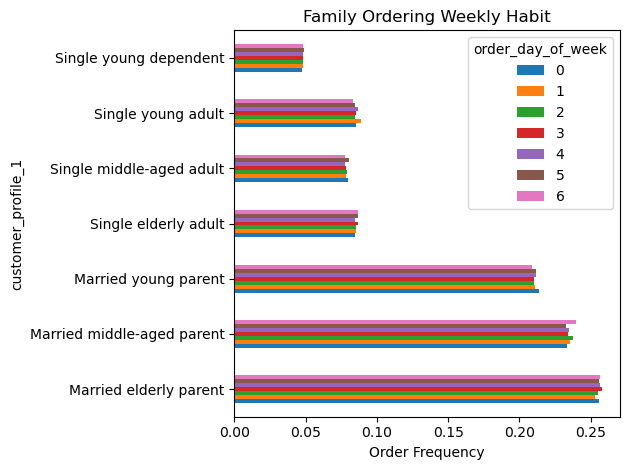

In [18]:
# Creating chart for 'family_spending_day'
family_spending_day_bar = family_spending_day.plot.barh()
plt.title("Family Ordering Weekly Habit", fontsize=12)
plt.xlabel("Order Frequency",fontsize=10)
plt.tight_layout()

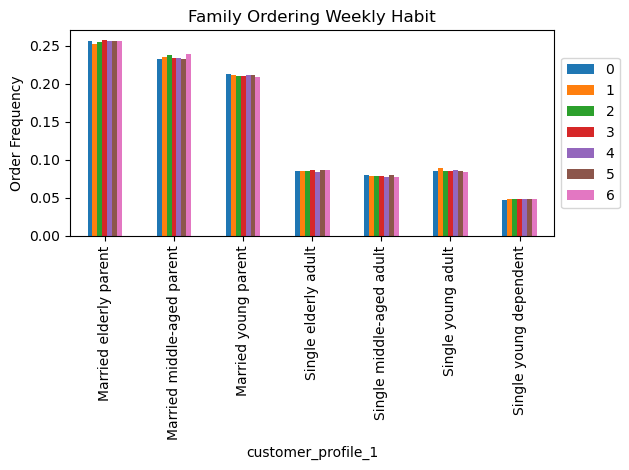

In [35]:
# Creating chart 2 for 'family_spending_day'
family_spending_day_chart = family_spending_day.plot.bar()
plt.title("Family Ordering Weekly Habit", fontsize=12)
plt.ylabel("Order Frequency",fontsize=10)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

### Export Visualizations

In [243]:
# Export regional_spending_bar_chart as regional_spending_habit.png
regional_spending_bar_n_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_spending_habit.png'))

In [110]:
# Export loyal_spending_bar_chart as loyal_spending_habit.png
loyal_spending_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_spending_habit.png'))

In [254]:
# Export loyal_spending_family_bar_chart as loyal_spending_family_habit.png
loyal_spending_family_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_spending_family_habit.png'))

In [263]:
# Export loyal_spending_day_bar_chart as loyal_spending_day.png
loyal_spending_day_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_spending_day.png'))

In [19]:
# Export family_spending_day_bar_chart as familyl_spending_day.png
family_spending_day_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_spending_day.png'))

In [36]:
# Export family_spending_day_chart as familyl_spending_day.png
family_spending_day_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_spending_day_2.png'))

# 06. Exclusion flag for low-activity customers

In [33]:
# Creating a subset to be exported
Low_activity_customers = df_cop.loc[df_cop['order_number'] < 5]

In [34]:
# Export Low_activity_customers
Low_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Low_activity_customers.pkl'))

In [36]:
df_cop.shape

(32404859, 27)

In [37]:
# Excluding the subset by dropping the subset
df_cop = df_cop.drop(df_cop[df_cop['order_number'] < 5].index)

In [255]:
# Checking output
df_cop.shape

(24414877, 32)

# 07. Profiling Customers

## Age, Family Status, and Number of Dependents

In [39]:
# Creating customer profile based on age, family_status, and number_of_dependents
df_cop.loc[(df_cop['Age'] >= 18) & (df_cop['Age'] < 40) & (df_cop['family_status'].isin (['single', 'divorced/widowed'])) & (df_cop['number_of_dependants'] > 0), 'customer_profile_1'] = 'Single young parent'
df_cop.loc[(df_cop['Age'] >= 18) & (df_cop['Age'] < 40) & (df_cop['family_status'] == 'living with parents and siblings'), 'customer_profile_1'] = 'Single young dependent'
df_cop.loc[(df_cop['Age'] >= 18) & (df_cop['Age'] < 40) & (df_cop['family_status'] == 'married') & (df_cop['number_of_dependants'] > 0), 'customer_profile_1'] = 'Married young parent'
df_cop.loc[(df_cop['Age'] >= 18) & (df_cop['Age'] < 40) & (df_cop['family_status'].isin (['single', 'divorced/widowed'])) & (df_cop['number_of_dependants'] == 0), 'customer_profile_1'] = 'Single young adult'
df_cop.loc[(df_cop['Age'] >= 18) & (df_cop['Age'] < 40) & (df_cop['family_status'] == 'married') & (df_cop['number_of_dependants'] == 0), 'customer_profile_1'] = 'Married young adult'
df_cop.loc[(df_cop['Age'] >= 40) & (df_cop['Age'] < 60) & (df_cop['family_status'].isin (['single', 'divorced/widowed'])) & (df_cop['number_of_dependants'] > 0), 'customer_profile_1'] = 'Single middle-aged parent'
df_cop.loc[(df_cop['Age'] >= 40) & (df_cop['Age'] < 60) & (df_cop['family_status'] == 'married') & (df_cop['number_of_dependants'] > 0), 'customer_profile_1'] = 'Married middle-aged parent'
df_cop.loc[(df_cop['Age'] >= 40) & (df_cop['Age'] < 60) & (df_cop['family_status'].isin (['single', 'divorced/widowed'])) & (df_cop['number_of_dependants'] == 0), 'customer_profile_1'] = 'Single middle-aged adult'
df_cop.loc[(df_cop['Age'] >= 40) & (df_cop['Age'] < 60) & (df_cop['family_status'] == 'married') & (df_cop['number_of_dependants'] == 0), 'customer_profile_1'] = 'Married middle-aged adult'
df_cop.loc[(df_cop['Age'] >= 60) & (df_cop['family_status'].isin (['single', 'divorced/widowed'])) & (df_cop['number_of_dependants'] > 0), 'customer_profile_1'] = 'Single elderly parent'
df_cop.loc[(df_cop['Age'] >= 60) & (df_cop['family_status'].isin (['single', 'divorced/widowed'])) & (df_cop['number_of_dependants'] == 0), 'customer_profile_1'] = 'Single elderly adult'
df_cop.loc[(df_cop['Age'] >= 60) & (df_cop['family_status'] == 'married') & (df_cop['number_of_dependants'] == 0), 'customer_profile_1'] = 'Married elderly adult'
df_cop.loc[(df_cop['Age'] >= 60) & (df_cop['family_status'] == 'married') & (df_cop['number_of_dependants'] > 0), 'customer_profile_1'] = 'Married elderly parent'

In [50]:
df_cop['customer_profile_1'].value_counts()

customer_profile_1
Married elderly parent        6241386
Married middle-aged parent    5741449
Married young parent          5155641
Single young adult            2091935
Single elderly adult          2089212
Single middle-aged adult      1923855
Single young dependent        1171399
Name: count, dtype: int64

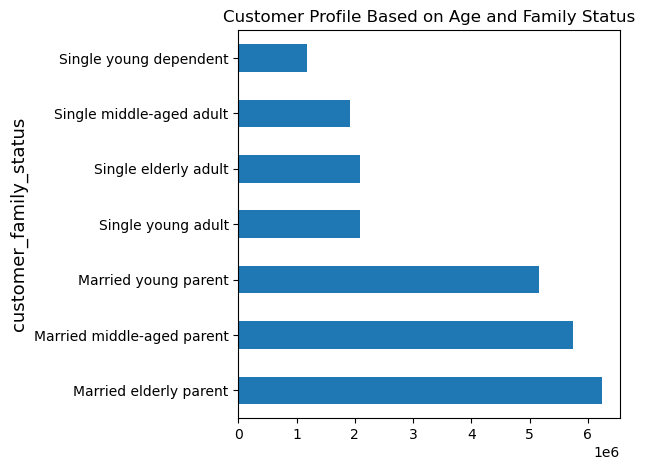

In [63]:
# Create chart for 'customer_profile_1'
customer_profile_family = df_cop['customer_profile_1'].value_counts().plot.barh()
plt.title ('Customer Profile Based on Age and Family Status')
plt.ylabel ('customer_family_status', fontsize = 13)
plt.tight_layout()

### The first customer profile is based on age and family status; the family status includes marital status and number of dependants.
### The chart shows that the greater numbers of Instacart customers are family people with dependants, that is married with dependants, with the Married elderly parent group (married people above 60 having dependants, for example, children)  being the largest group. The Single young dependent group (people between 18 and 40 still living with parents/siblings) have the least number of customers. 
### (Source of age info.: https://www.researchgate.net/figure/Age-intervals-and-age-groups_tbl1_228404297)

In [64]:
# Export chart for customer_profile_family as customer_profile_family.png
customer_profile_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profile_family.png'))

In [59]:
# Crosstab 'department' with 'customer_profile_1' to see ordering habit of family
family_ordering = pd.crosstab(df_copd['department'], df_copd['customer_profile_1'], dropna = False)

In [60]:
# Checking output
family_ordering

customer_profile_1,Married elderly parent,Married middle-aged parent,Married young parent,Single elderly adult,Single middle-aged adult,Single young adult,Single young dependent
department,,,,,,,
alcohol,26386,24312,23031,8936,9585,9438,6284
babies,85358,80222,70459,27775,26976,29562,15595
bakery,225756,207528,185904,75587,69934,76078,42543
beverages,524930,482904,422234,175452,160741,175862,94324
breakfast,133591,123621,111349,44414,41438,44308,26224
bulk,7225,6498,5903,2213,2069,2303,1347
canned goods,201899,185790,166868,65423,62249,67777,37784
dairy eggs,1048117,966571,875668,352593,323337,354308,199894
deli,199755,182587,165132,68073,62460,67461,37543


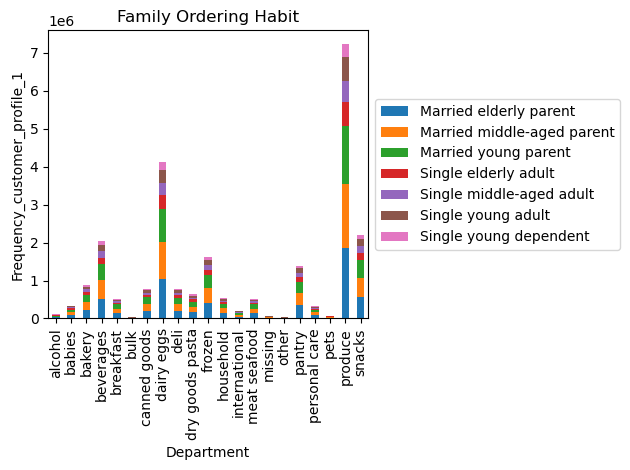

In [61]:
# Create visualization
family_ordering_bar = family_ordering.plot.bar(stacked = True)
plt.xlabel("Department", fontsize=10)
plt.ylabel("Frequency_customer_profile_1",fontsize=10)
plt.title("Family Ordering Habit", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()  

In [62]:
# Export chart for family_ordering_bar as family_ordering_habit.png
family_ordering_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_ordering_habit.png'))

### Profile based on Age

In [72]:
# Creating customer profile based on age only
df_copd.loc[(df_copd['Age'] >= 18) & (df_copd['Age'] < 40), 'customer_age_group'] = 'Young adults'
df_copd.loc[(df_copd['Age'] >= 40) & (df_copd['Age'] < 60), 'customer_age_group'] = 'Middle aged adults'
df_copd.loc[(df_copd['Age'] >= 60), 'customer_age_group'] = 'Elderly adults'

In [73]:
# Checking output
df_copd['customer_age_group'].value_counts()

customer_age_group
Young adults          8418975
Elderly adults        8330598
Middle aged adults    7665304
Name: count, dtype: int64

### Profile based on Family Status

In [75]:
# Creating profile based on Family Status only
df_copd.loc[(df_copd['family_status'].isin (['single', 'divorced/widowed'])), 'customer_family_status'] = 'Single'
df_copd.loc[(df_copd['family_status'] == 'living with parents and siblings'), 'customer_family_status'] = 'Dependent'
df_copd.loc[(df_copd['family_status'] == 'married'), 'customer_family_status'] = 'Married'

In [153]:
# Checking output
df_copd['customer_family_status'].value_counts()

customer_family_status
Married      17138476
Single        6105002
Dependent     1171399
Name: count, dtype: int64

In [86]:
# Crosstab Age with Family status
ordering_habit_age = pd.crosstab(df_copd['customer_age_group'], df_copd['customer_family_status'], dropna = False, normalize = 'columns')

In [87]:
ordering_habit_age

customer_family_status,Dependent,Married,Single
customer_age_group,,,
Elderly adults,0.0,0.364174,0.342213
Middle aged adults,0.0,0.335003,0.315128
Young adults,1.0,0.300823,0.342659


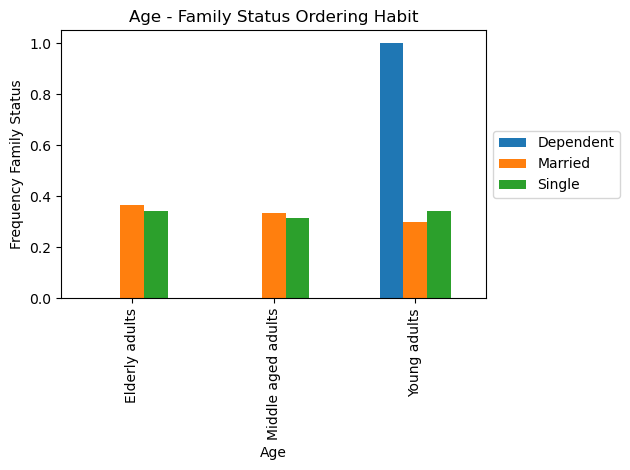

In [89]:
ordering_habit_age_bar = ordering_habit_age.plot.bar()
plt.xlabel("Age", fontsize=10)
plt.ylabel("Frequency Family Status",fontsize=10)
plt.title("Age - Family Status Ordering Habit", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

In [90]:
# Export chart
ordering_habit_age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ordering_habit_age.png'))

In [80]:
df_copd['customer_age_group'].value_counts(normalize = True)

customer_age_group
Young adults          0.34483
Elderly adults        0.34121
Middle aged adults    0.31396
Name: proportion, dtype: float64

## Department

### Creating Profile based on goods ordered ('department_id')

In [165]:
# Creating customer profile based on department_id
df_copd.loc[(df_copd['department_id'].isin ([4, 16, 19, 7, 1, 13, 3, 15, 20])) & (df_copd['customer_profile_1'].isin (['Married young parent', 'Married middle-aged parent', 'Married elderly parent'])), 'customer_profile_goods'] = 'Family most ordered goods'
df_copd.loc[(df_copd['department_id'].isin ([4, 16, 19, 7, 1, 13, 3, 15, 20])) & (df_copd['customer_profile_1'].isin (['Single young adult', 'Single middle-aged adult', 'Single elderly adult'])), 'customer_profile_goods'] = 'Individual most ordered goods'                                                                                 
df_copd.loc[(df_copd['department_id'].isin ([9, 17, 12, 14, 11, 18, 6, 5])) & (df_copd['customer_profile_1'].isin (['Married young parent', 'Married middle-aged parent', 'Married elderly parent'])), 'customer_profile_goods'] = 'Family average ordered goods'
df_copd.loc[(df_copd['department_id'].isin ([9, 17, 12, 14, 11, 18, 6, 5])) & (df_copd['customer_profile_1'].isin (['Single young adult', 'Single middle-aged adult', 'Single elderly adult'])), 'customer_profile_goods'] = 'Individual average ordered goods'                                                                             
df_copd.loc[(df_copd['department_id'].isin ([8, 21, 2, 10])) & (df_copd['customer_profile_1'].isin (['Married young parent', 'Married middle-aged parent', 'Married elderly parent'])), 'customer_profile_goods'] = 'Family Least ordered'
df_copd.loc[(df_copd['department_id'].isin ([8, 21, 2, 10])) & (df_copd['customer_profile_1'].isin (['Single young adult', 'Single middle-aged adult', 'Single elderly adult'])), 'customer_profile_goods'] = 'Individual Least ordered'                

In [166]:
# Checking frequency of 'customer_profile_goods'
df_copd['customer_profile_goods'].value_counts()

customer_profile_goods
Family most ordered goods           14765388
Individual most ordered goods        5266490
Family average ordered goods         2244556
Individual average ordered goods      792610
Family Least ordered                  128532
Individual Least ordered               45902
Name: count, dtype: int64

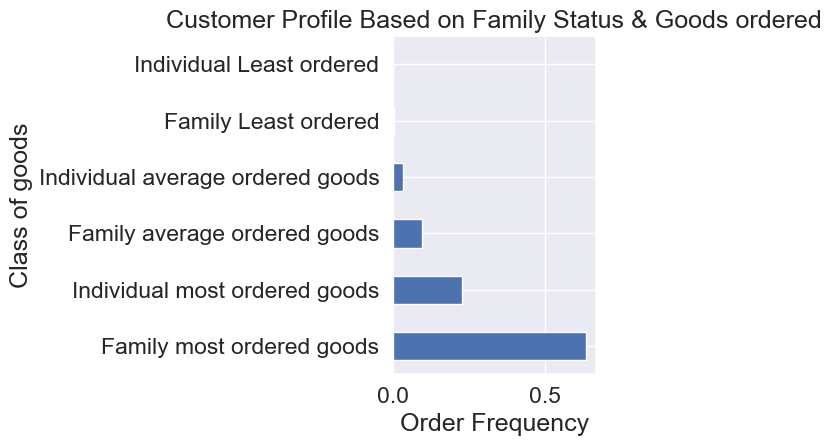

In [173]:
# Creating bar chart for 'customer_profile_goods'
cust_profile_dept_nbar = df_copd['customer_profile_goods'].value_counts(normalize = 'columns').plot.barh()
plt.title ('Customer Profile Based on Family Status & Goods ordered')
plt.ylabel ('Class of goods')
plt.xlabel ('Order Frequency')
plt.tight_layout()

In [174]:
# Export Chart
cust_profile_dept_nbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ncust_profile_goods.png'))

### Comparing between department with most orders and other departments

In [21]:
# Creating customer profile based on Department with the most orders (produce)
df_copd.loc[(df_copd['department'] == 'produce') & (df_copd['customer_profile_1'] == 'Single young adult'), 'customers_orders_dept'] = 'SYA Produce Orders'
df_copd.loc[(df_copd['department'] == 'produce') & (df_copd['customer_profile_1'] == 'Single middle-aged adult'), 'customers_orders_dept'] = 'SMAA Produce Orders'
df_copd.loc[(df_copd['department'] == 'produce') & (df_copd['customer_profile_1'] == 'Single elderly adult'), 'customers_orders_dept'] = 'SEA Produce Orders'
df_copd.loc[(df_copd['department'] == 'produce') & (df_copd['customer_profile_1'] == 'Married young parent'), 'customers_orders_dept'] = 'MYP Produce Orders'
df_copd.loc[(df_copd['department'] == 'produce') & (df_copd['customer_profile_1'] == 'Married middle-aged parent'), 'customers_orders_dept'] = 'MMAP Produce Orders'
df_copd.loc[(df_copd['department'] == 'produce') & (df_copd['customer_profile_1'] == 'Married elderly parent'), 'customers_orders_dept'] = 'MEP Produce Orders'
df_copd.loc[(df_copd['department'] == 'produce') & (df_copd['customer_profile_1'] == 'Single young dependent'), 'customers_orders_dept'] = 'SYD Produce Orders'
df_copd.loc[(df_copd['department']. isin (['alcohol', 'babies', 'bakery', 'beverages', 'breakfast', 'bulk', 'canned goods', 'dairy eggs', 'deli', 'dry goods pasta', 'frozen', 'household', 'international', 'meat seafood', 'missing', 'other', 'pantry', 'personal care', 'pets', 'snacks'])) & (df_copd['customer_profile_1'] == 'Single young adult'), 'customers_orders_dept'] = 'SYA Other Depts Orders'
df_copd.loc[(df_copd['department']. isin (['alcohol', 'babies', 'bakery', 'beverages', 'breakfast', 'bulk', 'canned goods', 'dairy eggs', 'deli', 'dry goods pasta', 'frozen', 'household', 'international', 'meat seafood', 'missing', 'other', 'pantry', 'personal care', 'pets', 'snacks'])) & (df_copd['customer_profile_1'] == 'Single middle-aged adult'), 'customers_orders_dept'] = 'SMMA Other Depts Orders'
df_copd.loc[(df_copd['department']. isin (['alcohol', 'babies', 'bakery', 'beverages', 'breakfast', 'bulk', 'canned goods', 'dairy eggs', 'deli', 'dry goods pasta', 'frozen', 'household', 'international', 'meat seafood', 'missing', 'other', 'pantry', 'personal care', 'pets', 'snacks'])) & (df_copd['customer_profile_1'] == 'Single elderly adult'), 'customers_orders_dept'] = 'SEA Other Depts Orders'
df_copd.loc[(df_copd['department']. isin (['alcohol', 'babies', 'bakery', 'beverages', 'breakfast', 'bulk', 'canned goods', 'dairy eggs', 'deli', 'dry goods pasta', 'frozen', 'household', 'international', 'meat seafood', 'missing', 'other', 'pantry', 'personal care', 'pets', 'snacks'])) & (df_copd['customer_profile_1'] == 'Married young parent'), 'customers_orders_dept'] = 'MYP Other Depts Orders'
df_copd.loc[(df_copd['department']. isin (['alcohol', 'babies', 'bakery', 'beverages', 'breakfast', 'bulk', 'canned goods', 'dairy eggs', 'deli', 'dry goods pasta', 'frozen', 'household', 'international', 'meat seafood', 'missing', 'other', 'pantry', 'personal care', 'pets', 'snacks'])) & (df_copd['customer_profile_1'] == 'Married middle-aged parent'), 'customers_orders_dept'] = 'MMAP Other Depts Orders'
df_copd.loc[(df_copd['department']. isin (['alcohol', 'babies', 'bakery', 'beverages', 'breakfast', 'bulk', 'canned goods', 'dairy eggs', 'deli', 'dry goods pasta', 'frozen', 'household', 'international', 'meat seafood', 'missing', 'other', 'pantry', 'personal care', 'pets', 'snacks'])) & (df_copd['customer_profile_1'] == 'Married elderly parent'), 'customers_orders_dept'] = 'MEP Other Depts Orders'
df_copd.loc[(df_copd['department']. isin (['alcohol', 'babies', 'bakery', 'beverages', 'breakfast', 'bulk', 'canned goods', 'dairy eggs', 'deli', 'dry goods pasta', 'frozen', 'household', 'international', 'meat seafood', 'missing', 'other', 'pantry', 'personal care', 'pets', 'snacks'])) & (df_copd['customer_profile_1'] == 'Single young dependent'), 'customers_orders_dept'] = 'SYD Other Depts Orders'

In [135]:
df_copd['customers_orders_dept'].value_counts()

customers_orders_dept
MEP Other Depts Orders     4391939
MMAP Other Depts Orders    4048428
MYP Other Depts Orders     3627605
MEP Produce Orders         1849447
MMAP Produce Orders        1693021
MYP Produce Orders         1528036
SYA Other Depts Orders     1469832
SEA Other Depts Orders     1469635
SMMA Other Depts Orders    1352650
SYD Other Depts Orders      827697
SYA Produce Orders          622103
SEA Produce Orders          619577
SMAA Produce Orders         571205
SYD Produce Orders          343702
Name: count, dtype: int64

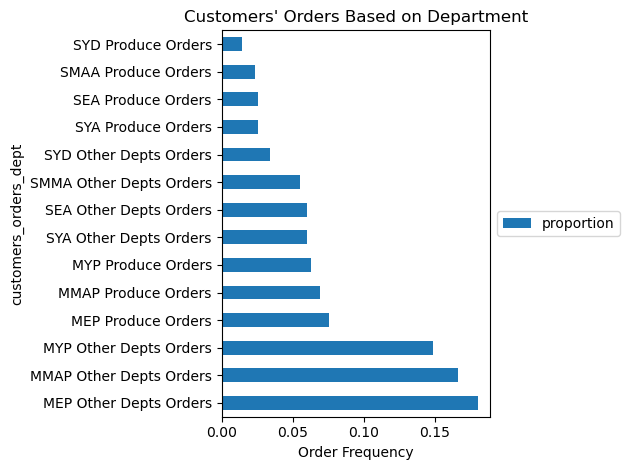

In [29]:
# Create chart for Customers' Profile based on Department
Family_deptal_chart = df_copd['customers_orders_dept'].value_counts(normalize = 'columns').plot.barh()
plt.xlabel("Order Frequency", fontsize=10)
plt.title("Customers' Orders Based on Department", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

In [22]:
# Creating customer profile based on Department with the most orders (produce)
df_copd.loc[(df_copd['department'] == 'produce') & (df_copd['customer_profile_1'] == 'Single young adult'), 'customers_orders_produce'] = 'SYA Produce Orders'
df_copd.loc[(df_copd['department'] == 'produce') & (df_copd['customer_profile_1'] == 'Single middle-aged adult'), 'customers_orders_produce'] = 'SMAA Produce Orders'
df_copd.loc[(df_copd['department'] == 'produce') & (df_copd['customer_profile_1'] == 'Single elderly adult'), 'customers_orders_produce'] = 'SEA Produce Orders'
df_copd.loc[(df_copd['department'] == 'produce') & (df_copd['customer_profile_1'] == 'Married young parent'), 'customers_orders_produce'] = 'MYP Produce Orders'
df_copd.loc[(df_copd['department'] == 'produce') & (df_copd['customer_profile_1'] == 'Married middle-aged parent'), 'customers_orders_produce'] = 'MMAP Produce Orders'
df_copd.loc[(df_copd['department'] == 'produce') & (df_copd['customer_profile_1'] == 'Married elderly parent'), 'customers_orders_produce'] = 'MEP Produce Orders'
df_copd.loc[(df_copd['department'] == 'produce') & (df_copd['customer_profile_1'] == 'Single young dependent'), 'customers_orders_produce'] = 'SYD Produce Orders'

In [23]:
df_copd['customers_orders_produce'].value_counts()

customers_orders_produce
MEP Produce Orders     1849447
MMAP Produce Orders    1693021
MYP Produce Orders     1528036
SYA Produce Orders      622103
SEA Produce Orders      619577
SMAA Produce Orders     571205
SYD Produce Orders      343702
Name: count, dtype: int64

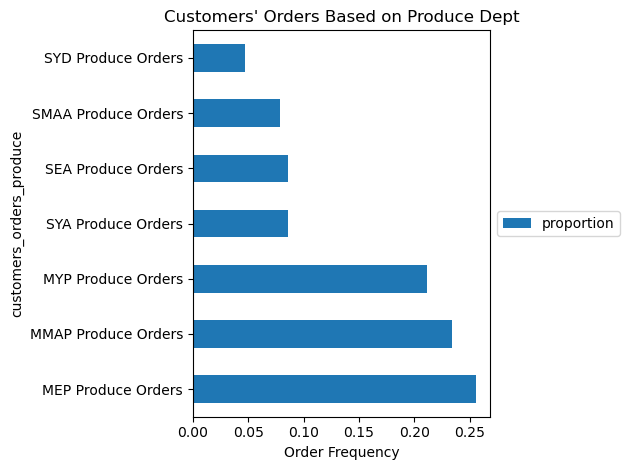

In [26]:
# Create chart for Customers' Profile based on Department 'Produce'
Family_deptal_produce_chart = df_copd['customers_orders_produce'].value_counts(normalize = 'columns').plot.barh()
plt.xlabel("Order Frequency", fontsize=10)
plt.title("Customers' Orders Based on Produce Dept", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

In [27]:
# Export 'Family_deptal_produce_chart' as 'Family_produce_dept_chart.png'
Family_deptal_produce_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Family_produce_dept_chart.png'))

## Days of week

In [130]:
df_copd.loc[(df_copd['order_day_of_week'].isin ([6, 0, 1])) & (df_copd['customer_profile_1'] == 'Single young adult'), 'customers_orders_day'] = 'SYA Weekend Orders'
df_copd.loc[(df_copd['order_day_of_week'].isin ([2, 3, 4,5])) & (df_copd['customer_profile_1'] == 'Single young adult'), 'customers_orders_day'] = 'SYA Weekday Orders'
df_copd.loc[(df_copd['order_day_of_week'].isin ([6, 0, 1])) & (df_copd['customer_profile_1'] == 'Single middle-aged adult'), 'customers_orders_day'] = 'SMAA Weekend Orders'
df_copd.loc[(df_copd['order_day_of_week'].isin ([2, 3, 4,5])) & (df_copd['customer_profile_1'] == 'Single middle-aged adult'), 'customers_orders_day'] = 'SMAA Weekday Orders'
df_copd.loc[(df_copd['order_day_of_week'].isin ([6, 0, 1])) & (df_copd['customer_profile_1'] == 'Single elderly adult'), 'customers_orders_day'] = 'SEA Weekend Orders'
df_copd.loc[(df_copd['order_day_of_week'].isin ([2, 3, 4,5])) & (df_copd['customer_profile_1'] == 'Single elderly adult'), 'customers_orders_day'] = 'SEA Weekday Orders'
df_copd.loc[(df_copd['order_day_of_week'].isin ([6, 0, 1])) & (df_copd['customer_profile_1'] == 'Married young parent'), 'customers_orders_day'] = 'MYP Weekend Orders'
df_copd.loc[(df_copd['order_day_of_week'].isin ([2, 3, 4, 5])) & (df_copd['customer_profile_1'] == 'Married young parent'), 'customers_orders_day'] = 'MYP Weekday Orders'
df_copd.loc[(df_copd['order_day_of_week'].isin ([6, 0, 1])) & (df_copd['customer_profile_1'] == 'Married middle-aged parent'), 'customers_orders_day'] = 'MMAP Weekend Orders'
df_copd.loc[(df_copd['order_day_of_week'].isin ([2, 3, 4, 5])) & (df_copd['customer_profile_1'] == 'Married middle-aged parent'), 'customers_orders_day'] = 'MMAP Weekday Orders'            
df_copd.loc[(df_copd['order_day_of_week'].isin ([6, 0, 1])) & (df_copd['customer_profile_1'] == 'Married elderly parent'), 'customers_orders_day'] = 'MEP Weekend Orders'
df_copd.loc[(df_copd['order_day_of_week'].isin ([2, 3, 4, 5])) & (df_copd['customer_profile_1'] == 'Married elderly parent'), 'customers_orders_day'] = 'MEP Weekday Orders'
df_copd.loc[(df_copd['order_day_of_week'].isin ([6, 0, 1])) & (df_copd['customer_profile_1'] == 'Single young dependent'), 'customers_orders_day'] = 'SYD Weekend Orders'
df_copd.loc[(df_copd['order_day_of_week'].isin ([2, 3, 4, 5])) & (df_copd['customer_profile_1'] == 'Single young dependent'), 'customers_orders_day'] = 'SYD Weekday Orders'


In [131]:
df_copd['customers_orders_day'].value_counts()

customers_orders_day
MEP Weekday Orders     3123989
MEP Weekend Orders     3117397
MMAP Weekend Orders    2880969
MMAP Weekday Orders    2860480
MYP Weekend Orders     2583398
MYP Weekday Orders     2572243
SYA Weekend Orders     1051219
SEA Weekend Orders     1044783
SEA Weekday Orders     1044429
SYA Weekday Orders     1040716
SMAA Weekend Orders     964339
SMAA Weekday Orders     959516
SYD Weekday Orders      586697
SYD Weekend Orders      584702
Name: count, dtype: int64

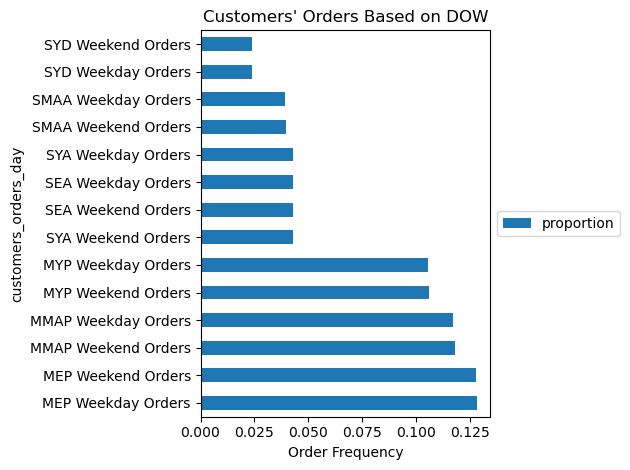

In [28]:
# Create chart for Customers' Profile based on order_day_of_week
Customer_dow_chart = df_copd['customers_orders_day'].value_counts(normalize = 'columns').plot.barh()
plt.xlabel("Order Frequency", fontsize=10)
plt.title("Customers' Orders Based on DOW", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

In [30]:
# Export charts
Customer_dow_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Customer_dow_chart.png'))
Family_deptal_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Family_deptal_chart.png'))

## Income

In [148]:
# Creating customer profile based on income
df_copd.loc[(df_copd['income'] >= 25903) & (df_copd['income'] <= 30000), 'customer_profile_income'] = 'Low-class income earner'
df_copd.loc[(df_copd['income'] > 30000) & (df_copd['income'] <= 201270), 'customer_profile_income'] = 'Middle-class income earner'
df_copd.loc[df_copd['income'] > 201270, 'customer_profile_income'] = 'High-class income earner'

In [149]:
# Checking frequency of 'customer_profile_income'
df_copd['customer_profile_income'].value_counts()

customer_profile_income
Middle-class income earner    24057932
High-class income earner        209246
Low-class income earner         147699
Name: count, dtype: int64

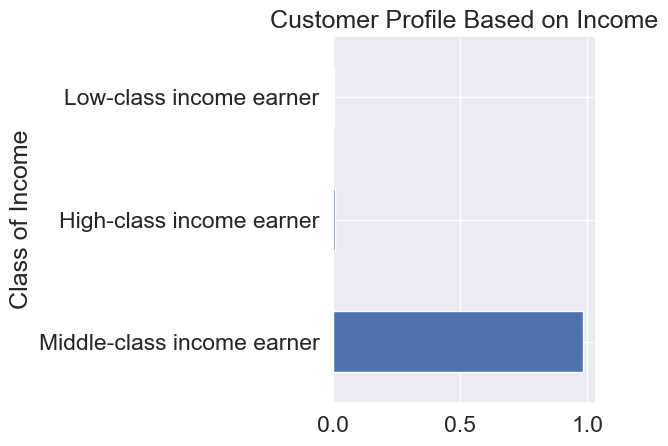

In [162]:
# Creating Chart for 'customer_profile_income'
customer_profile_income_nbar = df_copd['customer_profile_income'].value_counts(normalize = 'columns').plot.barh()
plt.title ('Customer Profile Based on Income')
plt.ylabel ('Class of Income')
plt.tight_layout()

In [163]:
# Export customer_profile_income_nbar
customer_profile_income_nbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profile_income_nbar.png'))

In [151]:
# Crosstabing income with family status
Family_income = pd.crosstab(df_copd['customer_profile_income'], df_copd['customer_profile_1'], dropna = False, normalize = 'columns')

In [152]:
# Checking output
Family_income

customer_profile_1,Married elderly parent,Married middle-aged parent,Married young parent,Single elderly adult,Single middle-aged adult,Single young adult,Single young dependent
customer_profile_income,,,,,,,
High-class income earner,0.011249,0.010934,0.003667,0.009677,0.012760,0.004394,0.002898
Low-class income earner,0.001032,0.001349,0.015301,0.000841,0.001698,0.016649,0.012615
Middle-class income earner,0.987720,0.987716,0.981032,0.989482,0.985542,0.978957,0.984487


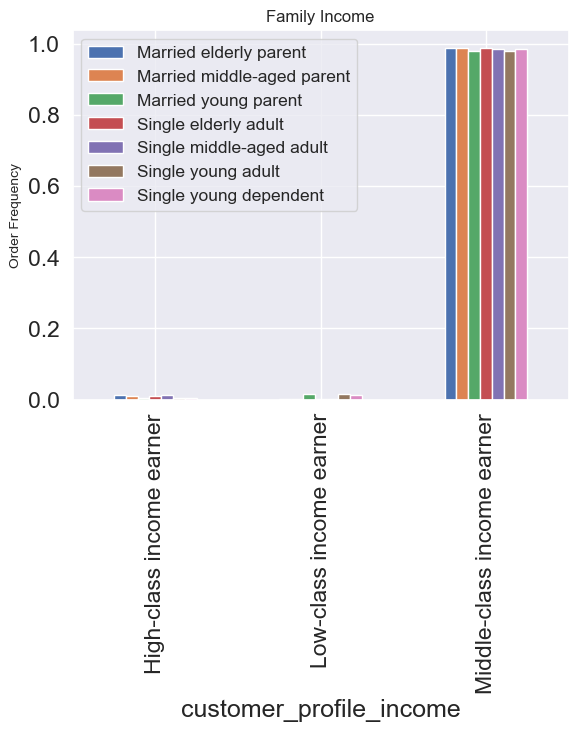

In [191]:
# Create chart
Family_income_bar = Family_income.plot.bar()
plt.ylabel("Order Frequency",fontsize=10)
plt.title("Family Income", fontsize=12)
plt.legend(loc='best', fontsize = 'x-small')

In [192]:
# Export Chart
Family_income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Family_income_chart.png'))

### The greatest percentage of Instacart customers are middle-class earners

# 08. Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [175]:
# Aggregating the max, mean, and min on customer_family profile for expenditure
df_copd_fam_price = df_copd.groupby(['customer_profile_1']).agg({'prices': ['mean', 'min', 'max']})

In [176]:
df_copd_fam_price

prices              
                                 mean  min      max
customer_profile_1                                 
Married elderly parent      11.682477  1.0  99999.0
Married middle-aged parent  11.563919  1.0  99999.0
Married young parent        12.317487  1.0  99999.0
Single elderly adult        11.357794  1.0  99999.0
Single middle-aged adult    12.714372  1.0  99999.0
Single young adult          12.071620  1.0  99999.0
Single young dependent      10.699303  1.0  99999.0

In [177]:
# Aggregating the max, mean, and min on customer_family profile for frequency
df_copd_fam_freq = df_copd.groupby(['customer_profile_1']).agg({'order_number': ['mean', 'min', 'max']})

In [178]:
df_copd_fam_freq

order_number        
                                   mean min max
customer_profile_1                             
Married elderly parent        21.870894   5  99
Married middle-aged parent    21.835679   5  99
Married young parent          21.961333   5  99
Single elderly adult          22.119075   5  99
Single middle-aged adult      22.279378   5  99
Single young adult            21.913576   5  99
Single young dependent        22.102311   5  99

In [179]:
# Crosstabing 'Price' with the column 'order_frequency_flag' to see whether there is a difference
customer_spending_habit_price = pd.crosstab(df_copd['prices'], df_copd['order_frequency_flag'], dropna = False, normalize = 'columns')

In [180]:
customer_spending_habit_price

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
prices,,,
1.0,0.003425,0.003796,0.003810
1.1,0.007568,0.007457,0.007523
1.2,0.007230,0.009318,0.008526
1.3,0.013328,0.012916,0.013037
1.4,0.012342,0.012654,0.012075
...,...,...,...
24.8,0.000011,0.000014,0.000011
24.9,0.000159,0.000191,0.000209
25.0,0.000402,0.000462,0.000450


# 09. Comparing profiles with regions

## Customer profile based on age and family status

In [181]:
# Crosstab 'customer_profile_1' with 'Region'
regional_family_status = pd.crosstab(df_copd['customer_profile_1'], df_copd['Region'], dropna = False, normalize = 'columns')

In [182]:
# Check output
regional_family_status

Region,Midwest,Northeast,South,West
customer_profile_1,,,,
Married elderly parent,0.251917,0.257065,0.256045,0.257523
Married middle-aged parent,0.239094,0.238556,0.230067,0.235851
Married young parent,0.209092,0.210059,0.214032,0.210108
Single elderly adult,0.084941,0.088143,0.085304,0.084721
Single middle-aged adult,0.081708,0.073395,0.077897,0.081040
Single young adult,0.084931,0.085292,0.087545,0.084220
Single young dependent,0.048318,0.047490,0.049110,0.046537


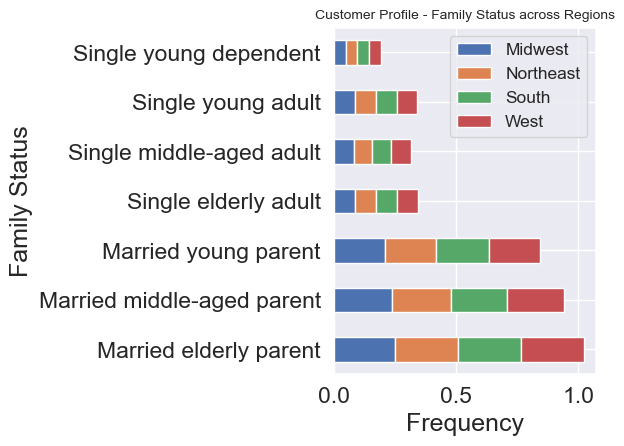

In [188]:
# Creating a bar chart to show the comparison of customer's family status across regions
regional_family_status_nbar = regional_family_status.plot.barh(stacked = True)
plt.title ('Customer Profile - Family Status across Regions', fontsize = 10)
plt.ylabel ('Family Status')
plt.xlabel ('Frequency')
plt.legend (fontsize = 'x-small')
plt.tight_layout()

In [193]:
# Crosstab 'customer_profile_1' with 'Region'
regional_cust_dept_status = pd.crosstab(df_copd['customers_orders_dept'], df_copd['Region'], dropna = False, normalize = 'columns')

In [194]:
regional_cust_dept_status

Region,Midwest,Northeast,South,West
customers_orders_dept,,,,
MEP Other Depts Orders,0.176473,0.182115,0.180462,0.180723
MEP Produce Orders,0.075444,0.074951,0.075583,0.076800
MMAP Other Depts Orders,0.168472,0.168203,0.161397,0.167494
MMAP Produce Orders,0.070622,0.070353,0.068670,0.068357
MYP Other Depts Orders,0.147036,0.147537,0.150580,0.148117
MYP Produce Orders,0.062056,0.062522,0.063452,0.061991
SEA Other Depts Orders,0.059546,0.061931,0.060267,0.059493
SEA Produce Orders,0.025395,0.026211,0.025037,0.025228
SMAA Produce Orders,0.024310,0.021236,0.022894,0.024702


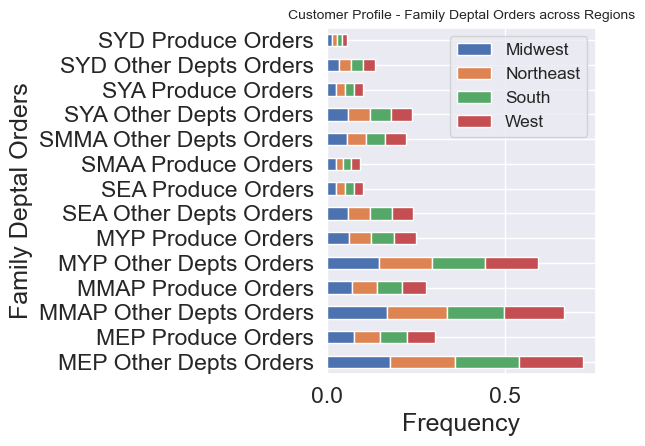

In [246]:
regional_cust_dept_nbar = regional_cust_dept_status.plot.barh(stacked = True)
plt.title ('Customer Profile - Family Deptal Orders across Regions', fontsize = 10)
plt.ylabel ('Family Deptal Orders')
plt.xlabel ('Frequency')
plt.legend (fontsize = 'x-small')
plt.tight_layout()

In [203]:
# Export chart
regional_cust_dept_nbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','regional_cust_dept.png'))

In [197]:
# Crosstab 'customers_orders_day' with 'Region'
regional_cust_day_status = pd.crosstab(df_copd['customers_orders_day'], df_copd['Region'], dropna = False, normalize = 'columns')

In [198]:
regional_cust_day_status

Region,Midwest,Northeast,South,West
customers_orders_day,,,,
MEP Weekday Orders,0.126318,0.129041,0.128086,0.128528
MEP Weekend Orders,0.125600,0.128024,0.127959,0.128995
MMAP Weekday Orders,0.118321,0.119882,0.114456,0.117741
MMAP Weekend Orders,0.120772,0.118674,0.115611,0.118111
MYP Weekday Orders,0.104113,0.104222,0.107086,0.105023
MYP Weekend Orders,0.104979,0.105837,0.106945,0.105085
SEA Weekday Orders,0.043595,0.044323,0.041768,0.042279
SEA Weekend Orders,0.041346,0.043819,0.043535,0.042441
SMAA Weekday Orders,0.040571,0.036086,0.039145,0.040559


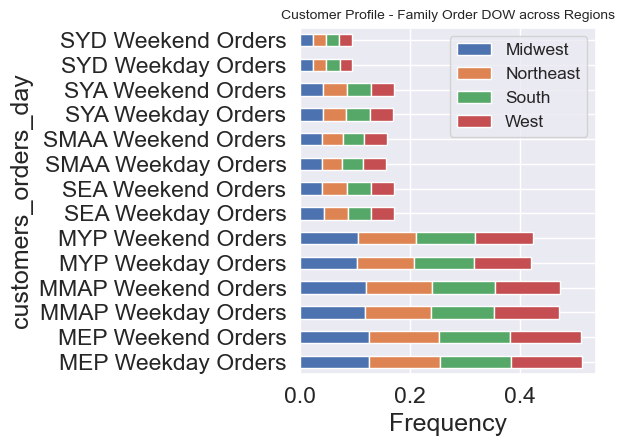

In [204]:
regional_cust_day_status_nbar = regional_cust_day_status.plot.barh(stacked = True)
plt.title ('Customer Profile - Family Order DOW across Regions', fontsize = 10)
plt.xlabel ('Frequency')
plt.legend (fontsize = 'x-small')
plt.tight_layout()

In [205]:
# Export chart
regional_cust_day_status_nbar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','regional_cust_day.png'))

## Customer profile based on income

In [213]:
# Crosstab 'customer_profile_income' with 'Region'
regional_customer_income = pd.crosstab(df_copd['customer_profile_income'], df_copd['Region'], dropna = False, normalize = 'columns')

In [214]:
# Checking output
regional_customer_income

Region,Midwest,Northeast,South,West
customer_profile_income,,,,
High-class income earner,0.009422,0.007590,0.008342,0.008766
Low-class income earner,0.007289,0.005726,0.006085,0.005096
Middle-class income earner,0.983289,0.986684,0.985573,0.986138


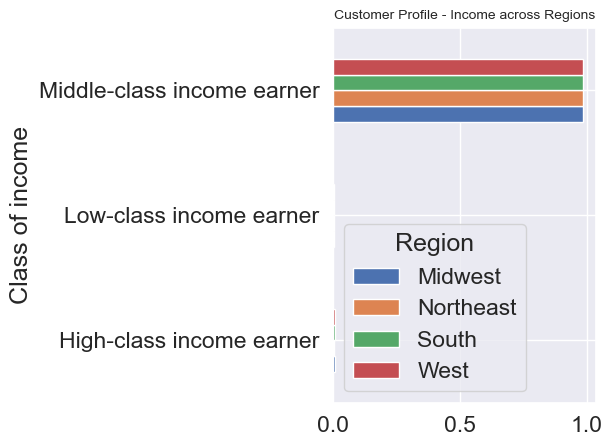

In [210]:
#Creating chart
regional_customer_income_chartn = regional_customer_income.plot.barh()
plt.title ('Customer Profile - Income across Regions', fontsize = 10)
plt.ylabel ('Class of income')
plt.tight_layout()

In [215]:
# Exporting chart
regional_customer_income_chartn.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_customer_income_normalized.png'))

## Customer profile based on produce (department)

In [216]:
# Checking relationship between department_id and customer_profile_income by crosstab
customer_produce = pd.crosstab(df_copd['department'], df_copd['customer_profile_income'], dropna = False, normalize = 'columns')

In [217]:
customer_produce

customer_profile_income,High-class income earner,Low-class income earner,Middle-class income earner
department,,,
alcohol,0.024612,0.005978,0.004237
babies,0.008459,0.007928,0.013842
bakery,0.049220,0.030772,0.036100
beverages,0.098951,0.122912,0.083032
breakfast,0.025630,0.024550,0.021446
bulk,0.000086,0.001828,0.001134
canned goods,0.035007,0.020549,0.032315
dairy eggs,0.174813,0.146535,0.168853
deli,0.028603,0.033751,0.032091


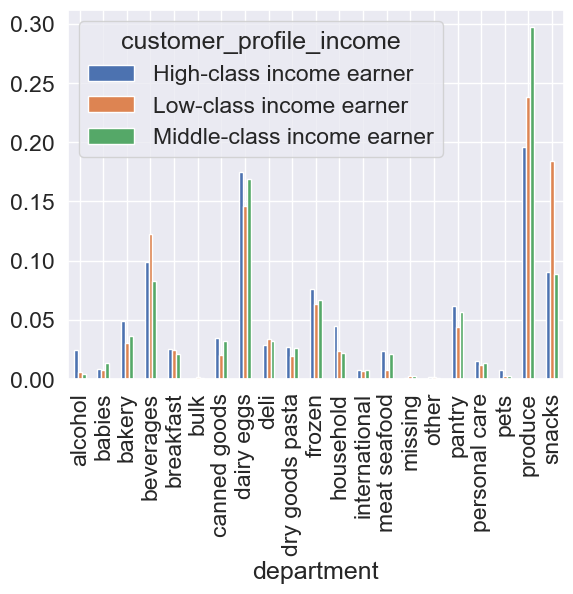

In [218]:
customer_produce_normalized = customer_produce.plot.bar()

In [219]:
# Exporting customer_produce
customer_produce_normalized.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_income_produce_n.png'))

In [223]:
# Crosstab 'department' with 'Region'
regional_produce = pd.crosstab(df_copd['department'], df_copd['Region'], dropna = False, normalize = 'columns')

In [224]:
regional_produce

Region,Midwest,Northeast,South,West
department,,,,
alcohol,0.004476,0.004295,0.004460,0.004413
babies,0.013743,0.013801,0.014020,0.013409
bakery,0.035956,0.036530,0.036015,0.036357
beverages,0.082679,0.085248,0.083723,0.082403
breakfast,0.021318,0.021472,0.021456,0.021746
bulk,0.001136,0.001066,0.001130,0.001164
canned goods,0.032248,0.031968,0.032371,0.032355
dairy eggs,0.168477,0.169110,0.168730,0.168853
deli,0.031993,0.032339,0.031940,0.032128


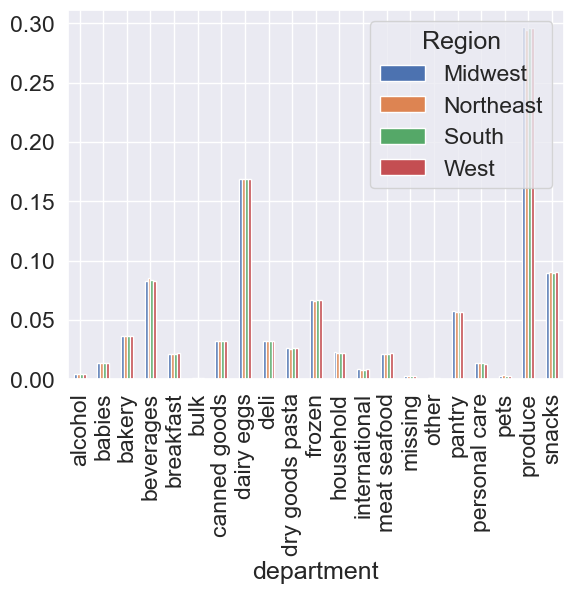

In [226]:
regional_produce_chart = regional_produce.plot.bar()

In [227]:
# Creating chart
regional_produce_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_produce_n.png'))

In [228]:
# Crosstab 'customer_profile_goods' with 'Region'
regional_customer_produce = pd.crosstab(df_cop['customer_profile_goods'], df_cop['Region'], dropna = False, normalize = 'columns')

In [229]:
# Checking output
regional_customer_produce

Region,Midwest,Northeast,South,West
customer_profile_goods,,,,
Family Least ordered,0.005490,0.005669,0.005524,0.005478
Family average ordered goods,0.096079,0.096278,0.096732,0.096997
Family most ordered goods,0.634078,0.638917,0.634048,0.635343
Individual Least ordered,0.001940,0.002208,0.001891,0.001954
Individual average ordered goods,0.034844,0.034022,0.033904,0.033731
Individual most ordered goods,0.227569,0.222907,0.227900,0.226496


Text(0.5, 0, 'Frequency')

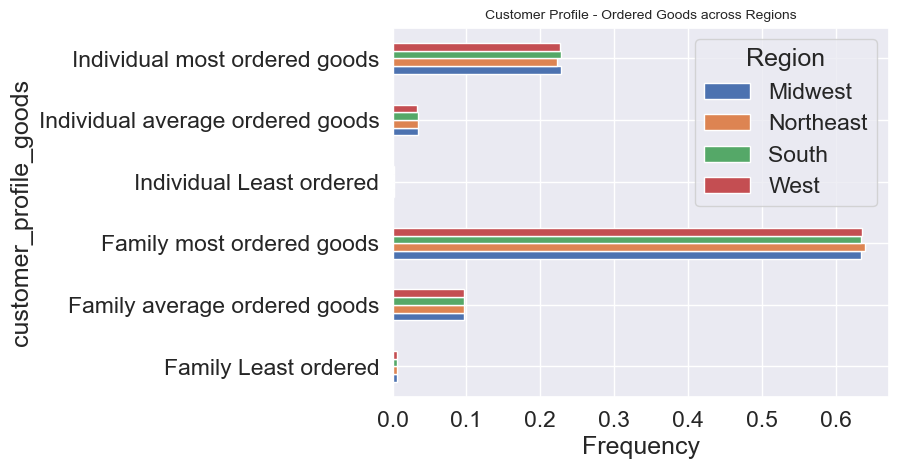

In [236]:
# Creating regional_customer_produce chart
regional_customer_produce_bar_n =regional_customer_produce.plot.barh()
plt.title ('Customer Profile - Ordered Goods across Regions', fontsize = 10)
plt.xlabel ('Frequency')

In [231]:
# Crosstab 'customer_profile_goods' with 'Region'
regional_customer_produce_1 = pd.crosstab(df_cop['customer_profile_goods'], df_cop['Region'], dropna = False)

In [232]:
# Checking output
regional_customer_produce_1

Region,Midwest,Northeast,South,West
customer_profile_goods,,,,
Family Least ordered,29843,23302,42697,32690
Family average ordered goods,522265,395735,747727,578829
Family most ordered goods,3446707,2626165,4901107,3791409
Individual Least ordered,10546,9074,14621,11661
Individual average ordered goods,189403,139840,262076,201291
Individual most ordered goods,1237012,916224,1761637,1351617


Text(0, 0.5, 'ordered goods')

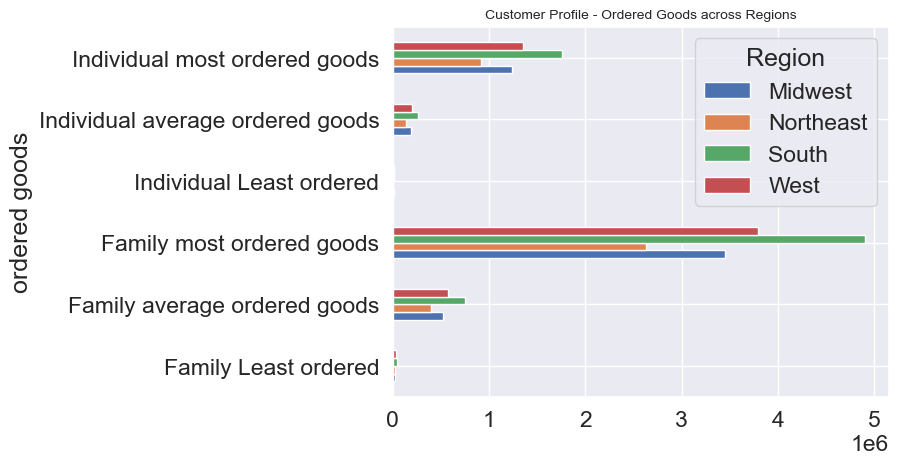

In [235]:
# Creating regional_customer_produce chart
regional_customer_produce_1_bar =regional_customer_produce_1.plot.barh()
plt.title ('Customer Profile - Ordered Goods across Regions', fontsize = 10)
plt.ylabel ('ordered goods')

In [237]:
# Exporting charts
regional_customer_produce_1_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_customer_produce1.png'))
regional_customer_produce_bar_n.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_customer_producen.png'))

# 10. Exporting dataframes as pickle files

In [239]:
# Export df_cop as customer_orders_products_updated.pkl
df_cop.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_orders_products_updated.pkl'))

In [37]:
df_copd.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined',
       'number_of_dependants', 'family_status', 'income', 'order_id',
       'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'product_name', 'department_id',
       'prices', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_prices', 'spending_flag', 'median_prior_order',
       'order_frequency_flag', '_merge', 'Region', 'customer_profile_1',
       'department', 'customer_age_group', 'customer_family_status',
       'customers_orders_dept', 'customers_orders_day',
       'customer_profile_income', 'customer_profile_goods',
       'customers_orders_produce'],
      dtype='object')

In [38]:
# Export df_copd as customer_orders_products_dept.pkl
df_copd.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_orders_products_dept.pkl'))